# 1. Tools and Dependencies

### Resources used in this project:
- Python https://www.python.org/
- Conda https://anaconda.cloud/getting-started-with-anaconda-individual-edition
- Jupyter Notebook https://jupyter.org/
- Tensorflow https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html
- Tensorflow Records https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html#create-tensorflow-records
- OpenCV https://opencv.org/
- NumPy https://numpy.org/
- MediaPipe https://google.github.io/mediapipe/
- Scikit-Learn https://scikit-learn.org/stable/
- Matplotlib https://matplotlib.org/

In [8]:
#!pip install tensorflow==2.5.0 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Define keypoints - MediaPipe Holistic

In [2]:
mp_holistic = mp.solutions.holistic                 
mp_drawing = mp.solutions.drawing_utils            

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                 
    results = model.process(image)               
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # face
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,128), thickness=1, circle_radius=1)
                             ) 
    # body
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)
                             ) 
    # left hand
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # right hand  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

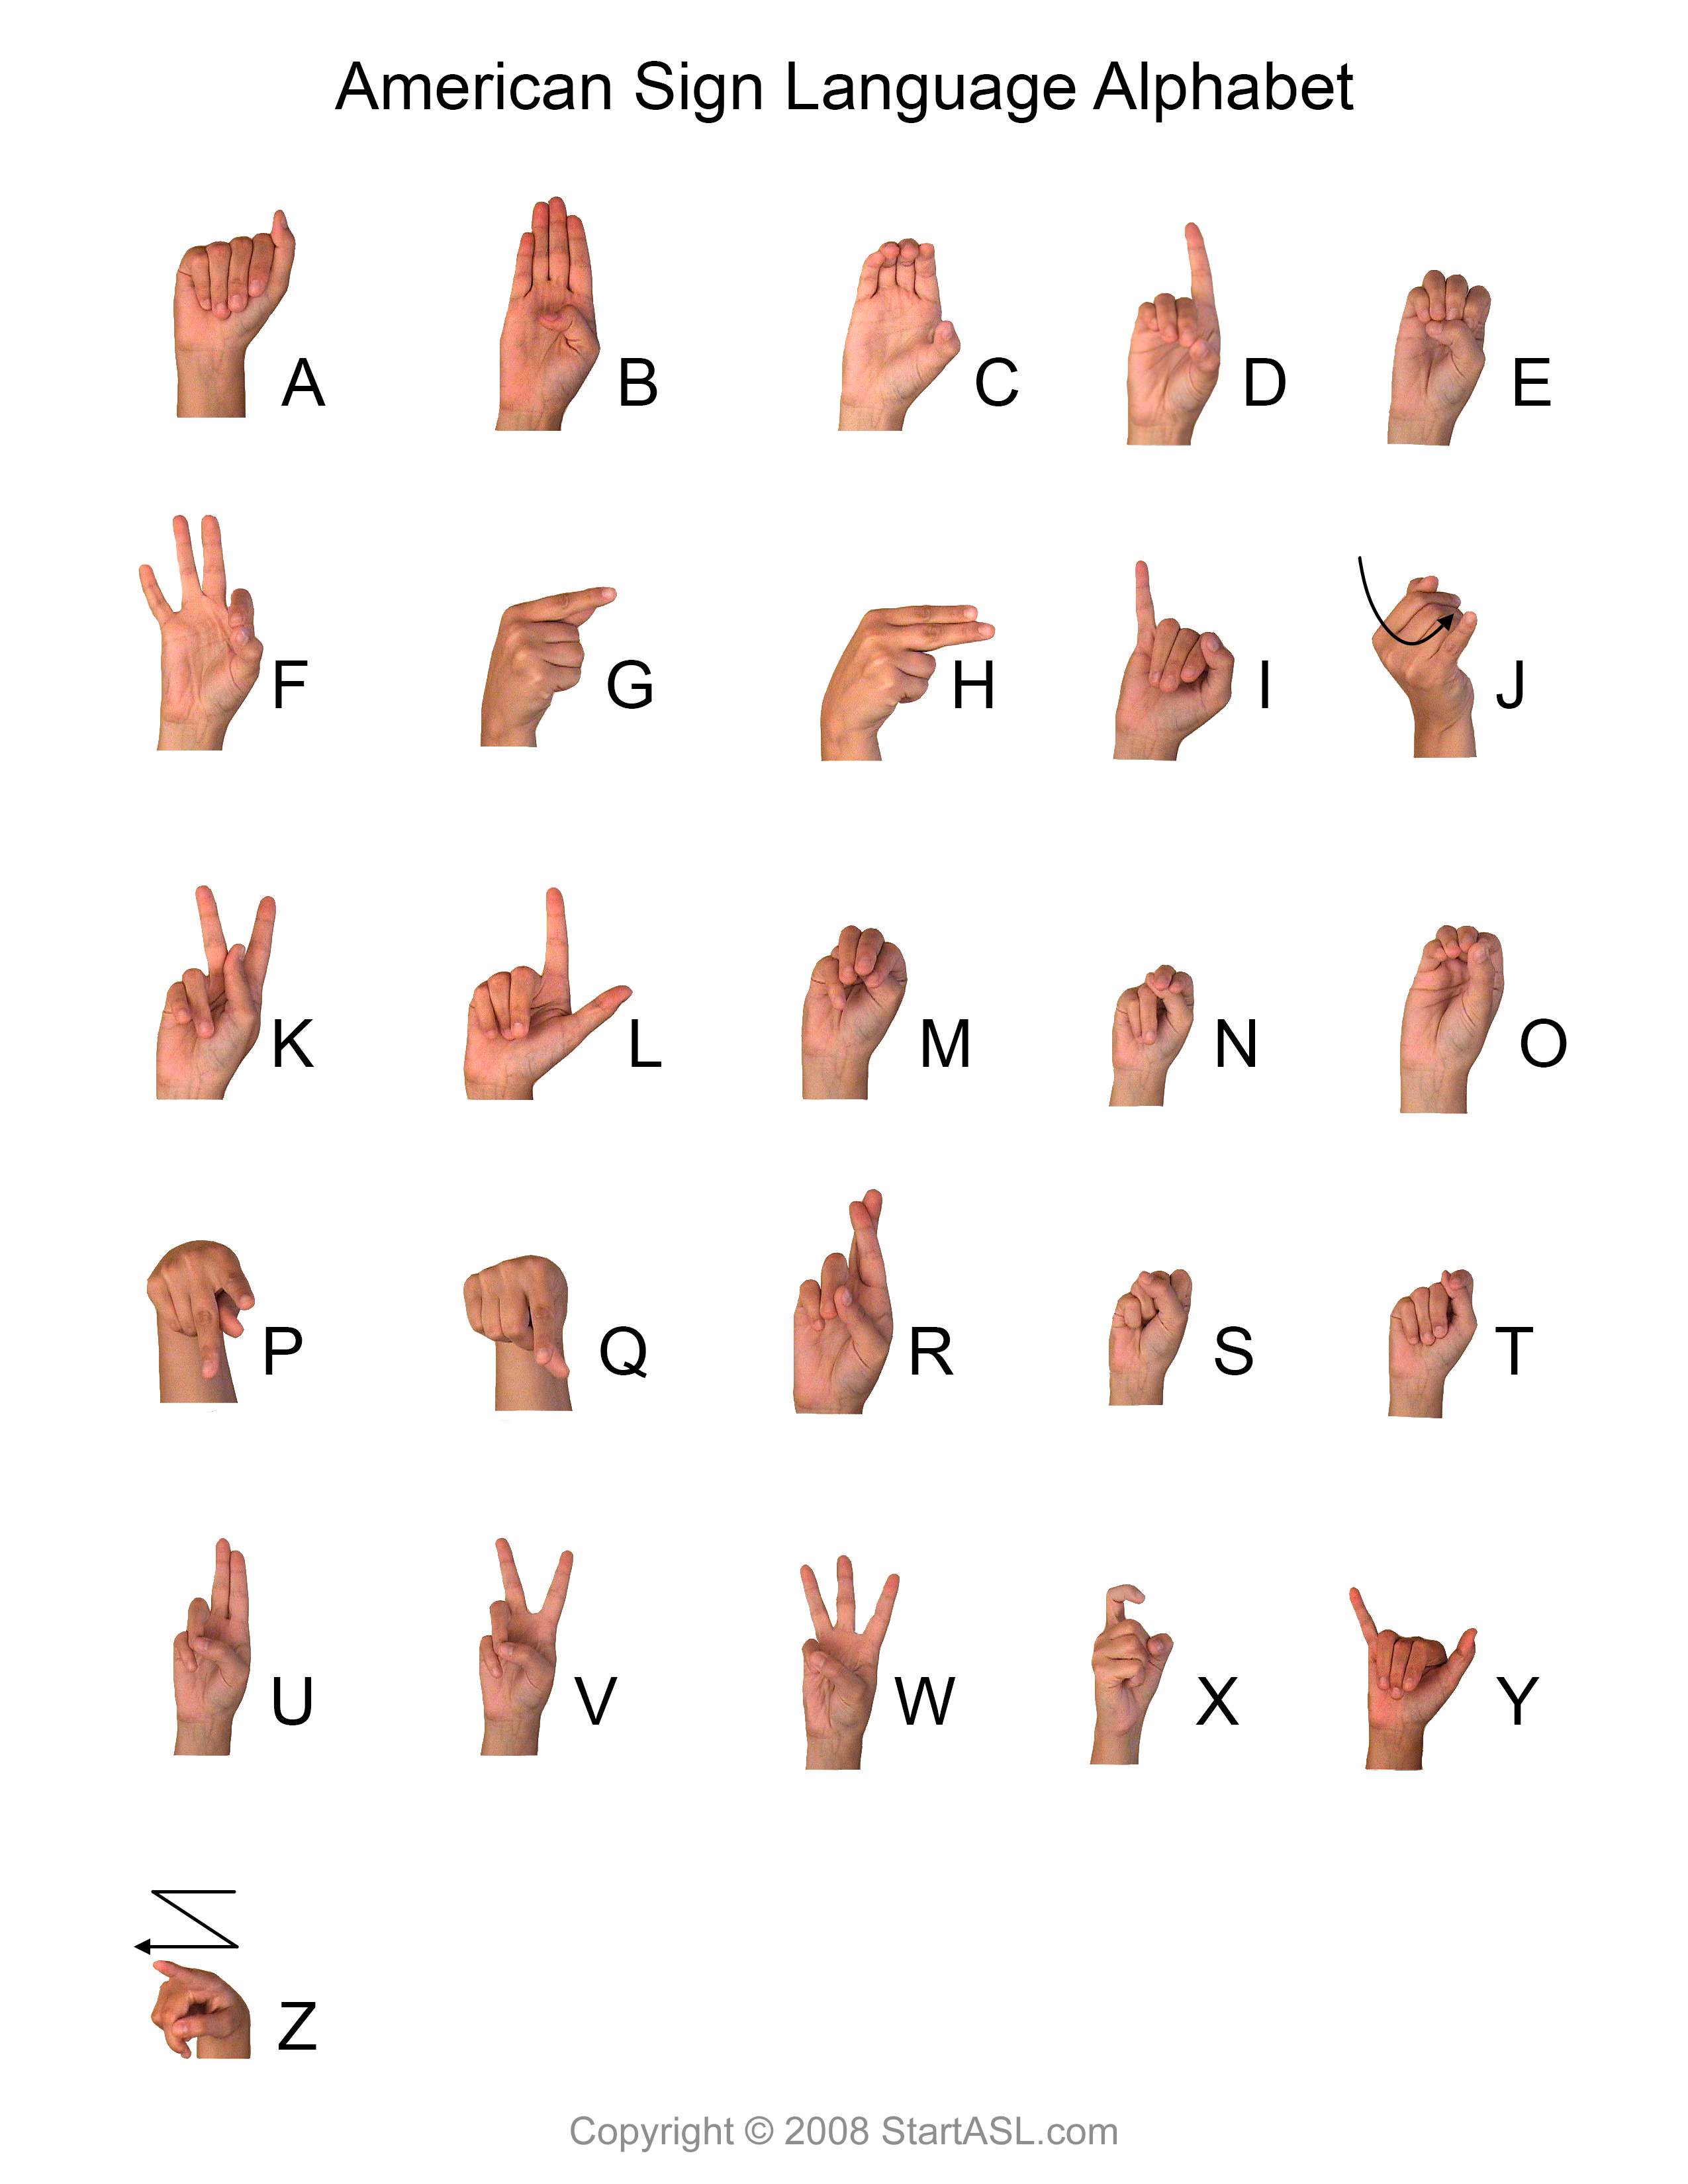

In [6]:
# capture a sing to initialize, cv2.VideoCapture(num) where num is a device number - depends on the laptop used, macbook - 0, surface 1 
# show a sign to init
cap = cv2.VideoCapture(1)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Web Camera Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

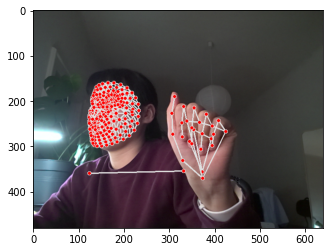

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Declare keypoint and save them all in one array

In [9]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
result_test = extract_keypoints(results)
#extract_keypoints(results).shape > (1662,)

In [14]:
result_test

array([ 0.20565495,  0.50050187, -0.66960663, ...,  0.        ,
        0.        ,  0.        ])

In [15]:
np.save('0', result_test)

In [16]:
np.load('0.npy')

array([ 0.20565495,  0.50050187, -0.66960663, ...,  0.        ,
        0.        ,  0.        ])

# 4. Collect Images

In [17]:
# folder for data - each sign has its own folder (data/a, data/b, data/c, ect)
DATA_PATH = os.path.join('data') 

actions = np.array(['a', 'b', 'c']) # signs

no_sequences = 30 # videos per sign

sequence_length = 30 # frames per sign

start_folder = 1

In [18]:
# create folder for each sign, each sign folder has separate folder to store separate stacks of frames
for action in actions: 
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect the data

In [20]:
cap = cv2.VideoCapture(1)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:

        for sequence in range(start_folder, start_folder+no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)
                
                # when "Start" is displayed a sign needs to be shown
                if frame_num == 0: 
                    cv2.putText(image, 'Start', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'a': 0, 'b': 1, 'c': 2}

In [24]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(90, 30, 1662)

In [26]:
np.array(labels).shape

(90,)

In [27]:
X = np.array(sequences)

In [28]:
X.shape

(90, 30, 1662)

In [29]:
y = to_categorical(labels).astype(int)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [31]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
# Log training
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [35]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [36]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 1s/step - loss: 1.1480 - categorical_accuracy: 0.3268
Epoch 2/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.0751 - categorical_accuracy: 0.3425
Epoch 3/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.4229 - categorical_accuracy: 0.3933
Epoch 4/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.5983 - categorical_accuracy: 0.3366
Epoch 5/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.2114 - categorical_accuracy: 0.4852
Epoch 6/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.8541 - categorical_accuracy: 0.3757
Epoch 7/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.3689 - categorical_accuracy: 0.4521
Epoch 8/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.1887 - categorical_accuracy: 0.4540
Epoch 9/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0846 - categorical_accuracy: 0.3933
Epo

3/3 [==============================] - 0s 61ms/step - loss: 0.5546 - categorical_accuracy: 0.7162
Epoch 74/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.5297 - categorical_accuracy: 0.7964
Epoch 75/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.5499 - categorical_accuracy: 0.6869
Epoch 76/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.5741 - categorical_accuracy: 0.6830
Epoch 77/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.5064 - categorical_accuracy: 0.7789
Epoch 78/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4882 - categorical_accuracy: 0.7318
Epoch 79/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.1564 - categorical_accuracy: 0.5107
Epoch 80/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.5051 - categorical_accuracy: 0.4717
Epoch 81/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9517 - categorical_accuracy: 0.5166
Epoch 

3/3 [==============================] - 0s 55ms/step - loss: 0.3628 - categorical_accuracy: 0.8278
Epoch 146/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7659 - categorical_accuracy: 0.7044
Epoch 147/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.6624 - categorical_accuracy: 0.5989
Epoch 148/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.5011 - categorical_accuracy: 0.8199
Epoch 149/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.4726 - categorical_accuracy: 0.7926
Epoch 150/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4623 - categorical_accuracy: 0.7730
Epoch 151/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.4417 - categorical_accuracy: 0.7886
Epoch 152/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3650 - categorical_accuracy: 0.8180
Epoch 153/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.3795 - categorical_accuracy: 0.819

3/3 [==============================] - 0s 57ms/step - loss: 0.3093 - categorical_accuracy: 0.8611
Epoch 218/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.3499 - categorical_accuracy: 0.9041
Epoch 219/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4523 - categorical_accuracy: 0.7378
Epoch 220/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3477 - categorical_accuracy: 0.8825
Epoch 221/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.3522 - categorical_accuracy: 0.8277
Epoch 222/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3157 - categorical_accuracy: 0.8923
Epoch 223/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.3527 - categorical_accuracy: 0.8336
Epoch 224/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3255 - categorical_accuracy: 0.8454
Epoch 225/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.3312 - categorical_accuracy: 0.814

3/3 [==============================] - 0s 55ms/step - loss: 0.5656 - categorical_accuracy: 0.7886
Epoch 290/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.6823 - categorical_accuracy: 0.6341
Epoch 291/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4349 - categorical_accuracy: 0.8316
Epoch 292/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4013 - categorical_accuracy: 0.7495
Epoch 293/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4542 - categorical_accuracy: 0.7750
Epoch 294/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3615 - categorical_accuracy: 0.8278
Epoch 295/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.3973 - categorical_accuracy: 0.7926
Epoch 296/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.3030 - categorical_accuracy: 0.9256
Epoch 297/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.3572 - categorical_accuracy: 0.913

3/3 [==============================] - 0s 56ms/step - loss: 0.8140 - categorical_accuracy: 0.5930
Epoch 362/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.7805 - categorical_accuracy: 0.6164
Epoch 363/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.7883 - categorical_accuracy: 0.6087
Epoch 364/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.7554 - categorical_accuracy: 0.7593
Epoch 365/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7166 - categorical_accuracy: 0.7867
Epoch 366/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.6696 - categorical_accuracy: 0.7867
Epoch 367/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.6702 - categorical_accuracy: 0.7730
Epoch 368/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.6345 - categorical_accuracy: 0.8356
Epoch 369/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.6065 - categorical_accuracy: 0.759

3/3 [==============================] - 0s 55ms/step - loss: 0.3417 - categorical_accuracy: 0.8357
Epoch 434/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.3181 - categorical_accuracy: 0.8259
Epoch 435/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.6176 - categorical_accuracy: 0.7711
Epoch 436/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2734 - categorical_accuracy: 0.8865
Epoch 437/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3025 - categorical_accuracy: 0.8748
Epoch 438/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2746 - categorical_accuracy: 0.9061
Epoch 439/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1926 - categorical_accuracy: 0.9217
Epoch 440/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2492 - categorical_accuracy: 0.9119
Epoch 441/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2429 - categorical_accuracy: 0.863

3/3 [==============================] - 0s 57ms/step - loss: 0.1869 - categorical_accuracy: 0.9276
Epoch 506/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1628 - categorical_accuracy: 0.9335
Epoch 507/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1909 - categorical_accuracy: 0.9276
Epoch 508/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1479 - categorical_accuracy: 0.9432
Epoch 509/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1645 - categorical_accuracy: 0.9472
Epoch 510/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1630 - categorical_accuracy: 0.9472
Epoch 511/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1488 - categorical_accuracy: 0.9393
Epoch 512/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1671 - categorical_accuracy: 0.9511
Epoch 513/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.1362 - categorical_accuracy: 0.943

3/3 [==============================] - 0s 57ms/step - loss: 1.6522 - categorical_accuracy: 0.5030
Epoch 578/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7890 - categorical_accuracy: 0.6594
Epoch 579/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.5966 - categorical_accuracy: 0.7965
Epoch 580/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3592 - categorical_accuracy: 0.8533
Epoch 581/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.3952 - categorical_accuracy: 0.7965
Epoch 582/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3085 - categorical_accuracy: 0.8708
Epoch 583/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3655 - categorical_accuracy: 0.8259
Epoch 584/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3047 - categorical_accuracy: 0.9393
Epoch 585/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.2865 - categorical_accuracy: 0.917

3/3 [==============================] - 0s 58ms/step - loss: 0.1426 - categorical_accuracy: 0.9745
Epoch 650/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1496 - categorical_accuracy: 0.9511
Epoch 651/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1783 - categorical_accuracy: 0.9374
Epoch 652/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2021 - categorical_accuracy: 0.8943
Epoch 653/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1503 - categorical_accuracy: 0.9491
Epoch 654/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1894 - categorical_accuracy: 0.9060
Epoch 655/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1378 - categorical_accuracy: 0.9511
Epoch 656/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.1592 - categorical_accuracy: 0.9159
Epoch 657/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1299 - categorical_accuracy: 0.955

3/3 [==============================] - 0s 60ms/step - loss: 0.5790 - categorical_accuracy: 0.6772
Epoch 722/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.6335 - categorical_accuracy: 0.6654
Epoch 723/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3864 - categorical_accuracy: 0.8571
Epoch 724/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4004 - categorical_accuracy: 0.8864
Epoch 725/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.4515 - categorical_accuracy: 0.8004
Epoch 726/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4638 - categorical_accuracy: 0.7202
Epoch 727/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.3473 - categorical_accuracy: 0.8748
Epoch 728/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4083 - categorical_accuracy: 0.8552
Epoch 729/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3141 - categorical_accuracy: 0.884

3/3 [==============================] - 0s 63ms/step - loss: 26.3432 - categorical_accuracy: 0.4443
Epoch 794/2000
3/3 [==============================] - 0s 59ms/step - loss: 22.6566 - categorical_accuracy: 0.3934
Epoch 795/2000
3/3 [==============================] - 0s 60ms/step - loss: 15.7682 - categorical_accuracy: 0.3404
Epoch 796/2000
3/3 [==============================] - 0s 60ms/step - loss: 9.1697 - categorical_accuracy: 0.2642
Epoch 797/2000
3/3 [==============================] - 0s 59ms/step - loss: 36.3409 - categorical_accuracy: 0.3308
Epoch 798/2000
3/3 [==============================] - 0s 60ms/step - loss: 37.8016 - categorical_accuracy: 0.4442
Epoch 799/2000
3/3 [==============================] - 0s 59ms/step - loss: 29.8238 - categorical_accuracy: 0.3307
Epoch 800/2000
3/3 [==============================] - 0s 61ms/step - loss: 7.9531 - categorical_accuracy: 0.3699
Epoch 801/2000
3/3 [==============================] - 0s 59ms/step - loss: 12.3972 - categorical_accuracy

3/3 [==============================] - 0s 59ms/step - loss: 22.8755 - categorical_accuracy: 0.3425
Epoch 865/2000
3/3 [==============================] - 0s 58ms/step - loss: 24.3786 - categorical_accuracy: 0.4188
Epoch 866/2000
3/3 [==============================] - 0s 63ms/step - loss: 14.5747 - categorical_accuracy: 0.3738
Epoch 867/2000
3/3 [==============================] - 0s 62ms/step - loss: 11.2056 - categorical_accuracy: 0.4013
Epoch 868/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.4969 - categorical_accuracy: 0.5284
Epoch 869/2000
3/3 [==============================] - 0s 61ms/step - loss: 7.1214 - categorical_accuracy: 0.4461
Epoch 870/2000
3/3 [==============================] - 0s 57ms/step - loss: 5.2517 - categorical_accuracy: 0.5146
Epoch 871/2000
3/3 [==============================] - 0s 61ms/step - loss: 4.0277 - categorical_accuracy: 0.5636
Epoch 872/2000
3/3 [==============================] - 0s 60ms/step - loss: 3.0119 - categorical_accuracy: 0

3/3 [==============================] - 0s 61ms/step - loss: 9.7523 - categorical_accuracy: 0.3132
Epoch 937/2000
3/3 [==============================] - 0s 63ms/step - loss: 6.7152 - categorical_accuracy: 0.3620
Epoch 938/2000
3/3 [==============================] - 0s 66ms/step - loss: 10.8148 - categorical_accuracy: 0.3738
Epoch 939/2000
3/3 [==============================] - 0s 65ms/step - loss: 13.0886 - categorical_accuracy: 0.3680
Epoch 940/2000
3/3 [==============================] - 0s 63ms/step - loss: 11.6547 - categorical_accuracy: 0.3698
Epoch 941/2000
3/3 [==============================] - 0s 60ms/step - loss: 15.6845 - categorical_accuracy: 0.3053
Epoch 942/2000
3/3 [==============================] - 0s 69ms/step - loss: 9.7018 - categorical_accuracy: 0.3562
Epoch 943/2000
3/3 [==============================] - 0s 63ms/step - loss: 9.5013 - categorical_accuracy: 0.3405
Epoch 944/2000
3/3 [==============================] - 0s 61ms/step - loss: 15.9811 - categorical_accuracy: 

3/3 [==============================] - 0s 68ms/step - loss: 0.7835 - categorical_accuracy: 0.7221
Epoch 1009/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7664 - categorical_accuracy: 0.7299
Epoch 1010/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7489 - categorical_accuracy: 0.7025
Epoch 1011/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6822 - categorical_accuracy: 0.7260
Epoch 1012/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.6973 - categorical_accuracy: 0.6810
Epoch 1013/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.7116 - categorical_accuracy: 0.7456
Epoch 1014/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6992 - categorical_accuracy: 0.6947
Epoch 1015/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.7191 - categorical_accuracy: 0.6438
Epoch 1016/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6732 - categorical_accurac

3/3 [==============================] - 0s 62ms/step - loss: 0.6479 - categorical_accuracy: 0.7084
Epoch 1081/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6946 - categorical_accuracy: 0.6183
Epoch 1082/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.6606 - categorical_accuracy: 0.6635
Epoch 1083/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.6242 - categorical_accuracy: 0.6770
Epoch 1084/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.6132 - categorical_accuracy: 0.7613
Epoch 1085/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6621 - categorical_accuracy: 0.6320
Epoch 1086/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.6564 - categorical_accuracy: 0.6498
Epoch 1087/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6944 - categorical_accuracy: 0.6810
Epoch 1088/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.6322 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 1.3067 - categorical_accuracy: 0.4658
Epoch 1153/2000
3/3 [==============================] - 0s 61ms/step - loss: 14.3885 - categorical_accuracy: 0.4578
Epoch 1154/2000
3/3 [==============================] - 0s 60ms/step - loss: 21.8952 - categorical_accuracy: 0.3993
Epoch 1155/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.7132 - categorical_accuracy: 0.4638
Epoch 1156/2000
3/3 [==============================] - 0s 63ms/step - loss: 3.0345 - categorical_accuracy: 0.4422
Epoch 1157/2000
3/3 [==============================] - 0s 65ms/step - loss: 2.1100 - categorical_accuracy: 0.5244
Epoch 1158/2000
3/3 [==============================] - 0s 69ms/step - loss: 7.9781 - categorical_accuracy: 0.4716
Epoch 1159/2000
3/3 [==============================] - 0s 68ms/step - loss: 11.1538 - categorical_accuracy: 0.3209
Epoch 1160/2000
3/3 [==============================] - 0s 70ms/step - loss: 4.4164 - categorical_accu

3/3 [==============================] - 0s 63ms/step - loss: 1.9416 - categorical_accuracy: 0.3680
Epoch 1224/2000
3/3 [==============================] - 0s 63ms/step - loss: 2.0733 - categorical_accuracy: 0.3405
Epoch 1225/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.8189 - categorical_accuracy: 0.4794
Epoch 1226/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.5817 - categorical_accuracy: 0.4208
Epoch 1227/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.7049 - categorical_accuracy: 0.3602
Epoch 1228/2000
3/3 [==============================] - 0s 62ms/step - loss: 3.4204 - categorical_accuracy: 0.3053
Epoch 1229/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.7911 - categorical_accuracy: 0.4285
Epoch 1230/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.7140 - categorical_accuracy: 0.3406
Epoch 1231/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.5958 - categorical_accurac

3/3 [==============================] - 0s 80ms/step - loss: 4.9821 - categorical_accuracy: 0.3210
Epoch 1295/2000
3/3 [==============================] - 0s 67ms/step - loss: 5.1910 - categorical_accuracy: 0.4149
Epoch 1296/2000
3/3 [==============================] - 0s 64ms/step - loss: 8.4598 - categorical_accuracy: 0.2838
Epoch 1297/2000
3/3 [==============================] - 0s 65ms/step - loss: 10.5340 - categorical_accuracy: 0.3425
Epoch 1298/2000
3/3 [==============================] - 0s 63ms/step - loss: 7.0648 - categorical_accuracy: 0.3895
Epoch 1299/2000
3/3 [==============================] - 0s 61ms/step - loss: 4.6657 - categorical_accuracy: 0.3424
Epoch 1300/2000
3/3 [==============================] - 0s 64ms/step - loss: 4.8212 - categorical_accuracy: 0.3581
Epoch 1301/2000
3/3 [==============================] - 0s 64ms/step - loss: 3.9682 - categorical_accuracy: 0.4540
Epoch 1302/2000
3/3 [==============================] - 0s 61ms/step - loss: 11.1552 - categorical_accur

3/3 [==============================] - 0s 69ms/step - loss: 4.1032 - categorical_accuracy: 0.3835
Epoch 1366/2000
3/3 [==============================] - 0s 69ms/step - loss: 6.5820 - categorical_accuracy: 0.3444
Epoch 1367/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.3682 - categorical_accuracy: 0.4227
Epoch 1368/2000
3/3 [==============================] - 0s 75ms/step - loss: 5.4969 - categorical_accuracy: 0.4090
Epoch 1369/2000
3/3 [==============================] - 0s 65ms/step - loss: 6.3001 - categorical_accuracy: 0.3405
Epoch 1370/2000
3/3 [==============================] - 0s 64ms/step - loss: 4.5771 - categorical_accuracy: 0.3757
Epoch 1371/2000
3/3 [==============================] - 0s 67ms/step - loss: 4.8259 - categorical_accuracy: 0.3659
Epoch 1372/2000
3/3 [==============================] - 0s 73ms/step - loss: 6.0454 - categorical_accuracy: 0.3953
Epoch 1373/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.5128 - categorical_accurac

3/3 [==============================] - 0s 66ms/step - loss: 1.4311 - categorical_accuracy: 0.3640
Epoch 1437/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.3617 - categorical_accuracy: 0.4227
Epoch 1438/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.2804 - categorical_accuracy: 0.4128
Epoch 1439/2000
3/3 [==============================] - 0s 65ms/step - loss: 5.8518 - categorical_accuracy: 0.4344
Epoch 1440/2000
3/3 [==============================] - 0s 66ms/step - loss: 9.2555 - categorical_accuracy: 0.4148
Epoch 1441/2000
3/3 [==============================] - 0s 66ms/step - loss: 7.8668 - categorical_accuracy: 0.3914
Epoch 1442/2000
3/3 [==============================] - 0s 66ms/step - loss: 7.2268 - categorical_accuracy: 0.4012
Epoch 1443/2000
3/3 [==============================] - 0s 63ms/step - loss: 7.6695 - categorical_accuracy: 0.2309
Epoch 1444/2000
3/3 [==============================] - 0s 68ms/step - loss: 4.6095 - categorical_accurac

3/3 [==============================] - 0s 70ms/step - loss: 1.0035 - categorical_accuracy: 0.4696
Epoch 1509/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0516 - categorical_accuracy: 0.4286
Epoch 1510/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.1094 - categorical_accuracy: 0.4129
Epoch 1511/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.4342 - categorical_accuracy: 0.3425
Epoch 1512/2000
3/3 [==============================] - 0s 65ms/step - loss: 2.8166 - categorical_accuracy: 0.4461
Epoch 1513/2000
3/3 [==============================] - 0s 66ms/step - loss: 4.4764 - categorical_accuracy: 0.3288
Epoch 1514/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.6192 - categorical_accuracy: 0.4266
Epoch 1515/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.3629 - categorical_accuracy: 0.4051
Epoch 1516/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.9380 - categorical_accurac

Epoch 1580/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.3775 - categorical_accuracy: 0.4051
Epoch 1581/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.0287 - categorical_accuracy: 0.3855
Epoch 1582/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.6913 - categorical_accuracy: 0.4129
Epoch 1583/2000
3/3 [==============================] - 0s 65ms/step - loss: 3.6646 - categorical_accuracy: 0.3620
Epoch 1584/2000
3/3 [==============================] - 0s 63ms/step - loss: 2.7110 - categorical_accuracy: 0.3014
Epoch 1585/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.9125 - categorical_accuracy: 0.3894
Epoch 1586/2000
3/3 [==============================] - 0s 79ms/step - loss: 4.3757 - categorical_accuracy: 0.3835
Epoch 1587/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.9582 - categorical_accuracy: 0.4794
Epoch 1588/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.6102 - cat

3/3 [==============================] - 0s 65ms/step - loss: 87.2112 - categorical_accuracy: 0.3425
Epoch 1652/2000
3/3 [==============================] - 0s 66ms/step - loss: 109.9969 - categorical_accuracy: 0.3718
Epoch 1653/2000
3/3 [==============================] - 0s 64ms/step - loss: 58.0523 - categorical_accuracy: 0.3699
Epoch 1654/2000
3/3 [==============================] - 0s 65ms/step - loss: 143.5029 - categorical_accuracy: 0.3052
Epoch 1655/2000
3/3 [==============================] - 0s 72ms/step - loss: 106.0450 - categorical_accuracy: 0.2837
Epoch 1656/2000
3/3 [==============================] - 0s 73ms/step - loss: 62.8194 - categorical_accuracy: 0.4012
Epoch 1657/2000
3/3 [==============================] - 0s 72ms/step - loss: 90.9480 - categorical_accuracy: 0.3854
Epoch 1658/2000
3/3 [==============================] - 0s 64ms/step - loss: 59.8667 - categorical_accuracy: 0.3229
Epoch 1659/2000
3/3 [==============================] - 0s 65ms/step - loss: 67.4161 - categor

3/3 [==============================] - 0s 65ms/step - loss: 3.8060 - categorical_accuracy: 0.5421
Epoch 1723/2000
3/3 [==============================] - 0s 63ms/step - loss: 2.3765 - categorical_accuracy: 0.6105
Epoch 1724/2000
3/3 [==============================] - 0s 64ms/step - loss: 2.6654 - categorical_accuracy: 0.5382
Epoch 1725/2000
3/3 [==============================] - 0s 65ms/step - loss: 3.1803 - categorical_accuracy: 0.4559
Epoch 1726/2000
3/3 [==============================] - 0s 77ms/step - loss: 13.0837 - categorical_accuracy: 0.4422
Epoch 1727/2000
3/3 [==============================] - 0s 65ms/step - loss: 19.1207 - categorical_accuracy: 0.3933
Epoch 1728/2000
3/3 [==============================] - 0s 64ms/step - loss: 28.3826 - categorical_accuracy: 0.3816
Epoch 1729/2000
3/3 [==============================] - 0s 63ms/step - loss: 30.2563 - categorical_accuracy: 0.2250
Epoch 1730/2000
3/3 [==============================] - 0s 63ms/step - loss: 23.5734 - categorical_ac

3/3 [==============================] - 0s 67ms/step - loss: 8.7661 - categorical_accuracy: 0.3660
Epoch 1794/2000
3/3 [==============================] - 0s 66ms/step - loss: 9.1445 - categorical_accuracy: 0.3757
Epoch 1795/2000
3/3 [==============================] - 0s 65ms/step - loss: 6.2315 - categorical_accuracy: 0.5147
Epoch 1796/2000
3/3 [==============================] - 0s 67ms/step - loss: 6.0048 - categorical_accuracy: 0.4207
Epoch 1797/2000
3/3 [==============================] - 0s 64ms/step - loss: 8.3775 - categorical_accuracy: 0.4443
Epoch 1798/2000
3/3 [==============================] - 0s 63ms/step - loss: 8.4531 - categorical_accuracy: 0.3738
Epoch 1799/2000
3/3 [==============================] - 0s 62ms/step - loss: 11.8940 - categorical_accuracy: 0.3601
Epoch 1800/2000
3/3 [==============================] - 0s 63ms/step - loss: 7.0436 - categorical_accuracy: 0.5929
Epoch 1801/2000
3/3 [==============================] - 0s 64ms/step - loss: 12.5217 - categorical_accur

3/3 [==============================] - 0s 66ms/step - loss: 1.6666 - categorical_accuracy: 0.6301
Epoch 1865/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.7835 - categorical_accuracy: 0.6458
Epoch 1866/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.3332 - categorical_accuracy: 0.6967
Epoch 1867/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.4820 - categorical_accuracy: 0.6204
Epoch 1868/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.8408 - categorical_accuracy: 0.6008
Epoch 1869/2000
3/3 [==============================] - 0s 66ms/step - loss: 2.5961 - categorical_accuracy: 0.4031
Epoch 1870/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.3986 - categorical_accuracy: 0.6242
Epoch 1871/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.4651 - categorical_accuracy: 0.5930
Epoch 1872/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.7521 - categorical_accurac

3/3 [==============================] - 0s 64ms/step - loss: 2.7763 - categorical_accuracy: 0.6497
Epoch 1937/2000
3/3 [==============================] - 0s 69ms/step - loss: 3.0680 - categorical_accuracy: 0.6223
Epoch 1938/2000
3/3 [==============================] - 0s 65ms/step - loss: 4.0304 - categorical_accuracy: 0.5166
Epoch 1939/2000
3/3 [==============================] - 0s 65ms/step - loss: 2.1613 - categorical_accuracy: 0.7240
Epoch 1940/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.2001 - categorical_accuracy: 0.7064
Epoch 1941/2000
3/3 [==============================] - 0s 66ms/step - loss: 2.8623 - categorical_accuracy: 0.6165
Epoch 1942/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.4272 - categorical_accuracy: 0.6281
Epoch 1943/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.1263 - categorical_accuracy: 0.5715
Epoch 1944/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.9614 - categorical_accurac

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Test Predictions

In [38]:
res = model.predict(X_test)

In [39]:
actions[np.argmax(res[4])]

'b'

In [40]:
actions[np.argmax(y_test[4])]

'c'

# 9. Accuracy

In [41]:
model.save('action.h5')

In [42]:
del model

In [43]:
model.load_weights('action.h5')

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [45]:
yhat = model.predict(X_test)

In [46]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [47]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [1, 0]],

       [[0, 2],
        [0, 3]],

       [[4, 0],
        [1, 0]]], dtype=int64)

In [48]:
accuracy_score(ytrue, yhat)

0.6